# <center> Tarea 3
    
# <center> Manuel Francisco Martinez Motta
# <center> Manuela Isabella Nobile Russi

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
from scipy.integrate import odeint

## Punto 1

### Parte a

### Parte b

Para el sistema autónomo:

$\begin{align*}
\dot{x} &= 2x - y \\
\dot{y} &= x + 2y
\end{align*}$

Podemos escribir la matriz jacobiana $\mathbf{J}$ como:


$\mathbf{J} = \begin{bmatrix}
\dfrac{\partial f}{\partial x} & \dfrac{\partial f}{\partial y} \\
\dfrac{\partial g}{\partial x} & \dfrac{\partial g}{\partial y}
\end{bmatrix}$


Donde:

$\begin{align*}
f(x, y) &= 2x - y \\
g(x, y) &= x + 2y
\end{align*}$

Calculamos las derivadas parciales y evaluamos en el punto fijo $(x_0, y_0)$ para obtener la matriz jacobiana:

$\mathbf{J} = \begin{bmatrix}
2 & -1 \\
1 & 2
\end{bmatrix}$

Entonces, la matriz de estabilidad $\mathbf{M}$ es simplemente la matriz jacobiana $\mathbf{J}$ para este sistema específico:

$\mathbf{M} = \begin{bmatrix}
2 & -1 \\
1 & 2
\end{bmatrix}$


### Parte c

In [3]:
M = np.array([[2, -1],
              [1, 2]])

# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(M)

# Mostrar resultados
print("Los valores propios son:" + str(eigenvalues))

print("\nY los Vectores propios:" + str(eigenvectors))

Los valores propios son:[2.+1.j 2.-1.j]

Y los Vectores propios:[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


---

**(d).** Dibuje la trayectoria sobre el espacio de fase. ¿Cuál es el punto crítico?

In [4]:
# Definir el sistema autónomo lineal
def system(X, t):
    x, y = X
    dxdt = 2*x - y
    dydt = x + 2*y
    return [dxdt, dydt]

# Condiciones iniciales
initial_conditions = [1, 1]
initial_conditions1 = [1, 0]
initial_conditions2 = [0, 1]

In [5]:
# Tiempo de integración
t = np.linspace(0, 20, 300)
solution = odeint(system, initial_conditions, t)
solution1 = odeint(system, initial_conditions1, t)
solution2 = odeint(system, initial_conditions2, t)

<IPython.core.display.Javascript object>


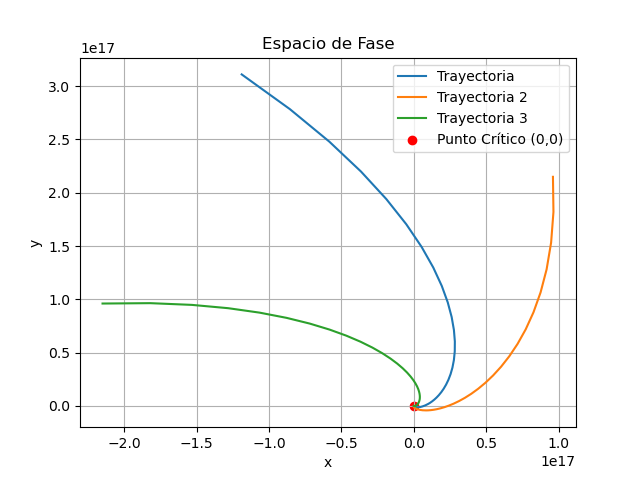

In [8]:
# Extraer las soluciones x e y
x, y = solution.T
x1, y1 = solution1.T
x2, y2 = solution2.T

# Graficar la trayectoria en el espacio de fase
plt.plot(x, y, label='Trayectoria')
plt.plot(x1, y1, label='Trayectoria 2')
plt.plot(x2, y2, label='Trayectoria 3')
plt.scatter([0], [0], color='red', marker='o', label='Punto Crítico (0,0)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espacio de Fase')
plt.legend()
plt.grid(True)
plt.show()

Tenemos que para el punto crítico

$f(x_{0}, y_{0}) = 0 = g(x_{0}, y_{0})$

Luego

$2x - y = 0 $
$y = 2x$

Y

$x + 2y = 0 $
$x = -2y$

Por lo cual la solución de la condición se da cuando

$x = 0$ y  $y = 0.$

Luego el punto crítico se encuentra en $(0.,\ 0.)$.

---

**2.** Construir la animación de esfera dura para el caso 3D. Simule $N = 50$ partículas libres de radio $R = 0.1$ metros contenidas en un volumen de $V = 10 \times 10 \times 10$; al menos $20$ segundos. Use un método adecuado para integrar las ecuaciones. Para que se vea fluido, debe reducir el tamaño de la simulación en un factor de $50$.


In [32]:
class Particle3D:
    def __init__(self, r0, v0, a0, t, m=1, radius=0.1, Id=0):
        
        self.dt = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        self.radius = radius
        self.Id = Id
        self.pE = 0
        self.p = self.m * self.v
        self.f = self.m * self.a
        self.R = np.zeros((len(t), len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)
        self.P = np.zeros_like(self.R)
        self.K = 20.
        self.VEk = np.zeros(len(t))
        self.VEp = np.zeros(len(t))

    def Evolution(self, i):
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotentialEnergy(i)
        self.a = self.f / self.m
        self.r += self.dt * self.v
        self.v += self.dt * self.a

    def CalculateForce(self, p):
        d = np.linalg.norm(self.r - p.r)
        compresion = self.radius + p.radius - d

        if compresion >= 0:
            Fn = self.K * compresion**3
            self.n = (self.r - p.r) / d
            self.f = np.add(self.f, Fn * self.n)
            self.pE += (self.K / 4) * (compresion**4)

    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.pE = 0.

    def SetPosition(self, i):
        self.R[i] = self.r

    def SetVelocity(self, i):
        self.V[i] = self.v
        self.P[i] = self.m * self.v
        self.VEk[i] = 0.5 * self.m * np.dot(self.v, self.v)
        self.VEp[i] = self.pE

    def SetPotentialEnergy(self, i):
        self.VEp[i] = self.pE

    def GetPosition(self, scale=1):
        return self.R[::scale]

    def GetVelocity(self, scale=1):
        return self.V[::scale]

    def GetMomentum(self, scale=1):
        return self.P[::scale]

    def GetKineticEnergy(self, scale=1):
        return self.VEk[::scale]

    def GetPotencialEnergy(self, scale=1):
        return self.VEp[::scale]

    def CheckWallLimits(self, limits, e, dim):
        for i in range(dim):
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -e * self.v[i]
                self.r[i] = limits[i] - self.radius
            if self.r[i] - self.radius < -limits[i]:
                self.v[i] = -e * self.v[i]
                self.r[i] = -limits[i] + self.radius
                

In [33]:
def GetParticles3D(N, t):
    particles = []

    for _ in range(N):
        new_position = np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10), np.random.uniform(-10, 10)])
        
        while any(np.linalg.norm(new_position - p.r) < p.radius * 2 for p in particles):
            new_position = np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10), np.random.uniform(-10, 10)])
        
        new_velocity = np.array([np.random.uniform(-5, 5), np.random.uniform(-5, 5), np.random.uniform(-5, 5)])

        new_acceleration = np.array([0., 0., 0.])
        new_mass = 1
        new_radius = 2
        new_id = 1

        particles.append(Particle3D(new_position, new_velocity, new_acceleration, t, m=new_mass, radius=new_radius, Id=new_id))

    return particles

In [34]:
dt = 0.002
tmax = 20
t = np.arange(0, tmax, dt)

Particles3D = GetParticles3D(50, t)

In [12]:
def RunSimulation3D(t, Particles):
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        # Calcular fuerzas entre partículas
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].CalculateForce(Particles[j])

        # Evolucionar las partículas y resetear fuerzas
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()

            # Interacción con las paredes en 3D
            limits = [10, 10, 10]  # Definir límites en cada dimensión
            e = 0.8  # Coeficiente de restitución

            for dim in range(3):  # Iterar sobre las tres dimensiones
                if Particles[i].r[dim] + Particles[i].radius > limits[dim]:
                    Particles[i].v[dim] = -e * Particles[i].v[dim]
                    Particles[i].r[dim] = limits[dim] - Particles[i].radius

                if Particles[i].r[dim] - Particles[i].radius < -limits[dim]:
                    Particles[i].v[dim] = -e * Particles[i].v[dim]
                    Particles[i].r[dim] = -limits[dim] + Particles[i].radius

    return Particles

In [13]:
Particles3D = RunSimulation3D(t, Particles3D)

Running simulation: 100%|████████████████████████████████████████████████████| 10000/10000 [02:57<00:00, 56.28 Steps/s]


In [14]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


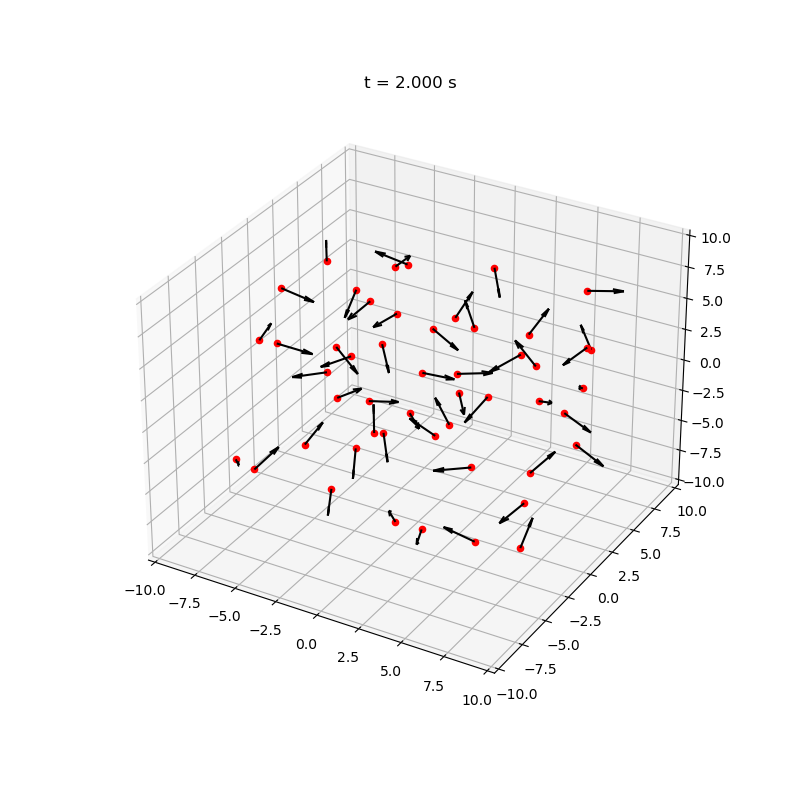

In [15]:
# Generar la animación
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(-10, 10)

def Update(i):
    init()
    ax.set_title(r't = %.3f s' % (t1[i]))

    for p in Particles3D:
        x = p.GetPosition(scale)[i, 0]
        y = p.GetPosition(scale)[i, 1]
        z = p.GetPosition(scale)[i, 2]

        vx = p.GetVelocity(scale)[i, 0]
        vy = p.GetVelocity(scale)[i, 1]
        vz = p.GetVelocity(scale)[i, 2]

        ax.scatter(x, y, z, color='r', marker='o')
        ax.quiver(x, y, z, vx, vy, vz, color='k', length=2, normalize=True)

# Actualizar la animación
Animation = anim.FuncAnimation(fig, Update, frames=len(t1), init_func=init, blit=False)

# Mostrar la animación
plt.show()

## Punto 3

### Parte a

Tenemos que el momento de inercia del centro de masa de un disco delgado es $I = \frac{1}{2} m r^2$. Demostración que se expone en la parte b de este punto

Además, sabemos que el momento de inercia de un disco respecto a un eje de rotación a una distancia $d$ de su centro es $I_d = m(d^2 + r^2)$ por el teorema de los ejes paraleros.

Luego si aplicamos este teorema para encontrar el momento de inercia del sistema completo respecto al eje de rotación tenemos que:

\begin{align*}
I_0 &= I_d + I \\
&= m(d^2 + r^2) + \frac{1}{2} m r^2 \\
&= m d^2 + m r^2 + \frac{1}{2} m r^2 \\
&= \frac{1}{4} m r^2 + m d^2.
\end{align*}

Por lo tanto, $I_0 = \frac{1}{4} m r^2 + m d^2$

### Parte b

Para calcular el momento de inercia del disco respecto a Z tenemos que:

$I_z = \int_{0}^{r} r^2 \text{d} m $, la ecuación general del momento de inercia.

Tomando que $m = \rho A = \rho (\pi r^2)$, luego que  $\text{d} m = 2 \pi r \rho \text{d} r$. Podemos reemplazar 


$ I_z = \int_{0}^{r} 2 \pi r \rho r^2 \text{d}r $

$ I_z = 2\pi \rho \int_{0}^{r} r^3 \text{d}r $

$ I_z = 2 \pi \rho \frac{r^4}{4} =  \rho \pi r^2 \frac{r^2}{2} $

Finalmente

$ I_z = \frac{1}{2}mr^2 $

### Parte c

El lagrangiano del sistema es

$$\mathcal{L} = \frac{1}{2}I_0\left(\dot{\phi}^2\sin^2\theta + \dot{\theta}^2\right) + \frac{1}{2}I_z\left(\dot{\phi}\cos\theta + \dot{\psi} \right)^2 - mgd\cos\theta$$

y la ecuación de Euler-Lagrange

$$\frac{\partial\mathcal{L}}{\partial q_i}- \frac{\text{d}}{\text{d}t}\left( \frac{\partial\mathcal{L}}{\partial \dot{q_i}}\right) = 0$$

Ahora necesitamos tomar las derivadas del Lagrangiano respecto a $\dot{\phi}$, $\dot{\psi}$ y $\theta$

Donde entonces

$$ \frac{\partial \mathcal{L}}{\partial \dot{\phi}} = I_0\dot{\phi}\sin^2\theta +  I_z\dot{\phi}\cos^2\theta + \dot{\psi}\cos\theta $$ 

$$ \frac{\partial \mathcal{L}}{\partial \dot{\psi}} = I_z \left(\dot{\phi}\cos\theta + \dot\psi\right) $$

Para $\theta$ además tenemos que

$\frac{\partial \mathcal{L}}{\partial \theta} = I_0\dot{\phi}^2\sin\theta\cos\theta - I_z(\dot{\phi}\cos\theta + \dot{\psi})\dot{\phi}\sin\theta + mgd\sin\theta$

$\frac{\partial \mathcal{L}}{\partial \dot{\theta}} = I_0\dot{\theta}$

$\frac{\text{d}}{\text{d}t}\left(\frac{\partial \mathcal{L}}{\partial \dot{\theta}}\right) = I_0 \ddot{\theta}$

Con esto finalmente podemos reemplazar en la ecuación de Euler Lagrange para $\theta$

En donde tenemos entonces que:

$$ \dot{\psi}^{2}\sin\theta\cos\theta(I_{\theta} - I_{z}) - \dot{\varphi}\dot{\psi}I_{z}\sin\theta + mgd\sin\theta =I_{\theta}\ddot{\theta} $$

### Parte e

In [35]:
t = np.linspace(0,8,1000)
m = 0.1; r = 0.1; d = 0.3; g = 9.81; psi_dot_ini = 400; theta_ini = np.pi/4

I_0 = (1/4)*m*r**2 + m*d**2
I_z = (1/2)*m*r**2

p_phi = I_z*psi_dot_ini*np.cos(theta_ini)


phi_dot = lambda theta: (p_phi - I_z*psi_dot_ini*np.cos(theta))/(I_0*np.sin(theta)**2+I_z*np.cos(theta)**2)

def EulerLagrange(y,t):
    
    phi,psi,theta,theta_dot = y
    
    dt_psi = psi_dot_ini
    dt_phi = phi_dot(theta)
    dt_theta = theta_dot
    ddt_theta = (dt_phi**2 *np.sin(theta)*np.cos(theta)*(I_0 - I_z) - dt_phi*dt_psi*I_z*np.sin(theta)+m*g*d*np.sin(theta))/I_0
    
    return [dt_phi, dt_phi, dt_theta, ddt_theta]


In [36]:
y_ini = (0.,0.,np.pi/4,0)
y = odeint(EulerLagrange,y_ini,t)

In [37]:
phi_ = y[:,0]
psi_ = y[:,1]
theta_ = y[:,2]

x = d*np.sin(theta_)*np.sin(phi_)
y = d*np.sin(theta_)*np.cos(phi_)
z = d*np.cos(theta_)

### Parte f

<IPython.core.display.Javascript object>


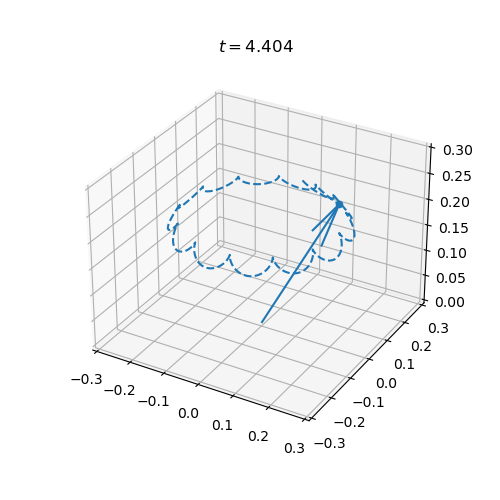

In [38]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection="3d")

def init_():
    
    ax.clear()
    ax.set_zlim(0,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_xlim(-0.3,0.3)
       
def Update_(i):   
    
    init_()
    ax.quiver(0,0,0,x[10*i],y[10*i],z[10*i])
    ax.plot(x[:10*i],y[:10*i],z[:10*i],"--")
    ax.scatter(x[10*i],y[10*i],z[10*i])
    ax.set_title(r"$t = %s$"%(round(t[10*i],3)))
        
Animation = anim.FuncAnimation(fig,Update_,frames=len(t[::10]),init_func=init_)

### Parte g 

La velocidad de precesión va a estar dada por $\dot{\phi}$ 

C:\Users\pachi\AppData\Local\Temp\ipykernel_11648\625729092.py:1: RuntimeWarning: invalid value encountered in true_divide
  phi_t = phi_/t


<IPython.core.display.Javascript object>


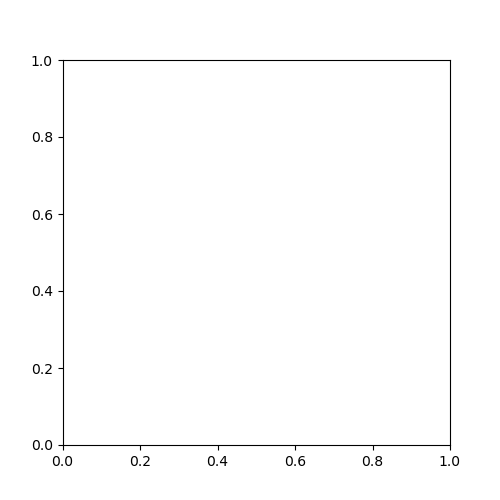

In [39]:
phi_t = phi_/t
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(111)
ax.plot(t, phi_t)

### Punto 4

### Parte c

Tenemos que 

$r_{LT}(t) = d_{LT} \cdot \cos(\omega t) \hat{i} + d_{LT} \cdot \sin(\omega t) \hat{j}$

$r_{NT}(t) = r(t) \cdot \cos(\phi(t)) \hat{i} + r(t) \cdot \sin(\phi(t)) \hat{j}$

Con estas ecuaciones podemos encontrar la distancia de separación luna-nave de la forma:

$r_{NL} = \left|r_{LT}(t) - r_{NT}(t)\right| = \sqrt{\left[d_{LT} \cdot \cos(\omega t) - r(t) \cdot \cos(\phi(t))\right]^{2} + \left[d_{LT} \cdot \sin(\omega t) - r(t) \cdot \sin(\phi(t))\right]^{2}}$

$ = \sqrt{\left[d_{LT}^{2} \cdot \cos^{2}(\omega t) - 2d_{LT} \cdot r(t) \cdot \cos(\omega t)\cos(\phi(t)) +  r^{2}(t) \cdot \cos^{2}(\phi(t))\right] + \left[d_{LT}^{2} \cdot \sin^{2}(\omega t) -2d_{LT} \cdot r(t) \cdot \sin(\omega t)\sin(\phi(t)) +  r^{2}(t) \cdot \sin^{2}(\phi(t))\right]}$

$ = \sqrt{d_{LT}^{2} \cdot \left(\cos^{2}(\omega t) + \sin^{2}(\omega t)\right) + r^{2}(t) \cdot \left(\cos^{2}(\phi(t)) + \sin^{2}(\phi(t))\right) - 2d_{LT} \cdot r(t) \cdot \left(\cos(\omega t)\cos(\phi(t)) + \sin(\omega t)\sin(\phi(t))\right)}$

Finalmente, tenemos que

$$r_{NL}(r, \phi, t) = \sqrt{r(t)^{2} + d^{2} - 2r(t) \cdot d_{TL} \cdot \cos(\phi - \omega{t})}$$

### Parte d

Tenemos que el Lagrangiano de este problema es de la forma 

$$L = T - U = \frac{1}{2} m \cdot \left(\dot{r}^{2}(t) + r^{2}(t) \cdot \dot{\phi}^{2}(t)\right) + G\frac{mm_{T}}{r(t)} + G\frac{mm_{L}}{r_{NL}(r, \phi, t)} $$

Puesto que la la energía cinética es

$T = \frac{1}{2}m\cdot \left|r_{NT}(t)\right|^{2} = \frac{1}{2} m \cdot \left(\dot{r}^{2}(t) + r^{2}(t) \cdot \dot{\phi}^{2}(t)\right)$

Ya que

$r_{NT} = r(t) \cdot \cos(\phi(t)) \hat{i} + r(t) \cdot \sin(\phi(t))\hat{j}$

$\left|r_{NT}(t)\right|^{2} = \dot{r}^{2}(t) \cdot \cos^{2}(\phi(t)) - 2\dot{r}(t) \cdot r(t) \cdot \cos(\phi(t)) \cdot \sin(\phi(t)) + r^{2}(t) \cdot \sin^{2}(\phi(t)) \cdot \dot{\phi}^{2}(t) + \dot{r}^{2}(t) \cdot \sin^{2}(\phi(t)) + 2\dot{r}(t) \cdot r(t) \cdot \cos(\phi(t)) \cdot \sin(\phi(t)) + r^{2}(t) \cdot \cos^{2}(\phi(t)) \cdot \dot{\phi}^{2}(t) = \dot{r}^{2}(t) \cdot \left(\cos^{2}(\phi(t)) + \sin^{2}(\phi(t)\right) + r^{2}(t) \cdot \dot{\phi}^{2}(t) \cdot \left(\cos^{2}(\phi(t)) + \sin^{2}(\phi(t)\right)$

$\left|r_{NT}(t)\right|^{2} = \dot{r}^{2}(t) + r^{2}(t) \cdot \dot{\phi}^{2}(t)$


Y la energía potencial derivada del potencial gravitacional es de la forma

$U = -G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}$

Con esto podemos calcular el Hamiltoniano

$H = p_{r}\dot{r} + p_{\phi}\phi - L $

donde

$p_{r} = \frac{\partial L}{\partial \dot{r}} = m\dot{r}(t)$

y

$p_{\phi} = \frac{\partial L}{\partial \dot{\phi}} = mr^{2}(t)\dot{\phi}(t)$

Finalmente, escribiendo el lagrangiano con los momentos generalizados y reemplazandolos en la ecuación de Hamilton tenemos que

$H = \frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}} - G\frac{mm_{T}}{r} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}$

### Parte e

Tenemos que 

$\dot{r} = \frac{\partial H}{\partial p_{r}} = \frac{\partial }{\partial p_{r}} \left(\frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{L}(r, \phi, t)}\right) = \frac{p_{r}}{m}$

$\dot{\phi} = \frac{\partial H}{\partial p_{\phi}} = \frac{\partial }{\partial p_{\phi}} \left(\frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = \frac{p_{\phi}}{mr^{2}(t)} $

$\dot{p}_{r} = -\frac{\partial H}{\partial r} = - \frac{\partial }{\partial r} \left(\frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = -\frac{\partial }{\partial r} \left(\frac{p_{r}^{2}}{2m}\right) - \frac{\partial }{\partial r} \left(\frac{p_{\phi}^{2}}{2mr^{2}(t)}\right) + \frac{\partial }{\partial r} \left(G\frac{mm_{T}}{r(t)}\right) + \frac{\partial }{\partial r} \left(G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = \frac{p_{\phi}^{2}}{mr^{3}(t)} - G\frac{mm_{T}}{r^{2}(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)} \cdot \left[r(t) - d_{TL} \cdot \cos(\phi - \omega{t})\right]$

$\dot{p_{r}} = \frac{p_{\phi}^{2}}{^{3}(t)} - G\frac{mm_{T}}{r^{2}(t)} - G\frac{mm_{L}}{r^{3}_{NL}(r, \phi, t)} \cdot \left[r(t) - d_{TL} \cdot \cos(\phi - \omega{t})\right]$

$\dot{p}_{\phi} = -\frac{\partial H}{\partial \phi} = - \frac{\partial }{\partial r} \left(\frac{p_{r}^{2}}{m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = -\frac{\partial }{\partial \phi} \left(\frac{p_{r}^{2}}{2m}\right) - \frac{\partial }{\partial \phi} \left(\frac{p_{\phi}^{2}}{2mr^{2}(t)}\right) + \frac{\partial }{\partial \phi} \left(G\frac{mm_{T}}{r(t)}\right) + \frac{\partial }{\partial \phi} \left(G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = - G\frac{mm_{L}}{r_{NL}^{3}(r, \phi, t)} \cdot \left[r(t) \cdot d_{TL} \cdot \sin(\phi - \omega{t})\right]$

$\dot{p}_{\phi} = - G\frac{mm_{L}}{r_{NL}^{3}(r, \phi, t)} \cdot \left[r(t) \cdot d_{TL} \cdot \sin(\phi - \omega{t})\right]$

### Parte f

Para $\dot{\tilde{r}}$

$\dot{\tilde{r}} = \frac{\dot{r}}{d_{TL}} = \frac{p_{r}}{m \cdot d_{TL}} = \tilde{p}_{r}$

Para $ \dot{\phi}$

$ \dot{\phi} = \frac{p_{r}/d^{2}_{TL}}{m \cdot r^{2}(t)/d^{2}_{TL}} = \frac{\tilde{p}_{\phi}}{\tilde{r}^{2}}$

Para $\dot{\tilde{p}}_{r}$

$\dot{\tilde{p}}_{r} = \frac{\dot{p}_{r}}{md_{TL}} = \frac{1}{md_{TL}} \cdot \left[ \frac{\tilde{p}_{\phi}^{2} \cdot md_{TL}}{\tilde{r}^{3}} - G\frac{m_{T} \cdot m}{d^{2}_{TL}\tilde{r}^{2}} - G\frac{mm_{L}}{d_{TL}^{2} \cdot r'^{3}} \cdot \left[\tilde{r} - \cos(\phi - \omega{t})\right]\right] = \frac{\tilde{p}_{\phi}^{2}}{\tilde{r}^{3}} - G\frac{m_{T}}{d_{TL}^{3}} \cdot \left[\frac{1}{\tilde{r}^{2}} + \frac{m_{L}}{m_{T} \cdot r'^{3}} \cdot \left[\tilde{r} - \cos(\phi - \omega{t})\right]\right]$

$\dot{\tilde{p}}_{r} = \frac{\dot{\tilde{p}}_{\phi}^{2}}{r^{3}} - \Delta \left[\frac{1}{\tilde{r}^{2}} + \frac{\mu}{\tilde{r}'^{3}}\left[r - d\cos(\phi - \omega t)\right]\right]$

Para $\dot{\tilde{p}}_{\phi}$

$\dot{\tilde{p}}_{\phi} = \frac{\dot{p}_{\phi}}{md_{TL}^{2}} - G\frac{m_{L}}{d^{3}_{TL}r'^{3}} \cdot \left[\tilde{r} \cdot \sin(\phi - \omega{t})\right] = - G\frac{m_{T}}{d^{3}_{TL}} \cdot \frac{m_{L}}{m_{T}} \cdot \frac{1}{r'} \cdot \left[\tilde{r} \cdot \sin(\phi - \omega{t})\right] $

$\dot{\tilde{p}}_{\phi} = -\frac{\Delta\mu\tilde{r}}{\tilde{r}'^{3}} \cdot \sin(\phi - \omega t)$

### Parte g

Tenemos que para $t_{0}$, $\vec{v}_{0} = (v_{0}\cos(\theta), v_{0}\sin(\theta))$. Luego

$\tilde{p}_{r}^{0} = \left.\frac{1}{d_{TL}} \cdot \frac{d\sqrt{x^{2} + y^{2}}}{dt}\right\vert_{t = t_{0}} = \frac{1}{d_{TL}} \cdot \frac{x \cdot \dot{x}_{0} + y \cdot \dot{y}_{0}}{\sqrt{x^{2} + y^{2}}} = \frac{1}{d_{TL}} \cdot \frac{\left|r\right|\cos(\phi) \cdot v_{0}\cos(\theta) + \left|r\right|\sin(\phi) \cdot v_{0}\sin(\theta)}{\left|r\right|}  = \frac{v_{0}}{d_{TL}} \cdot \left(\cos(\phi)\cos(\theta) + \sin(\phi)\sin(\theta)\right)$

$\tilde{p}_{r}^{0}= \tilde{v}_{0}\cdot\cos(\phi - \theta)$

Por otro lado

$\tilde{p}_{\phi}^{0}= \frac{mr^{2}\dot{\theta}}{md_{TL}^{2}} = \tilde{r}^{2} \cdot \frac{d}{dt}\arctan\left(\frac{x}{y}\right) = \frac{\tilde{r}^{2} \cdot x^{2}}{x^{2} + y^{2}} \cdot \frac{d}{dt}\left(\frac{y}{x}\right) = \frac{\tilde{r}^{2} \cdot x^{2}}{x^{2} + y^{2}} \cdot \frac{\dot{y}\cdot x - y \cdot \dot{x}}{x^{2}} = \frac{\tilde{r}^{2} \cdot \left|r\right| \cdot v_{0} \left(\sin(\theta) \cos(\phi) - \cos(\theta)\sin(\phi)\right)}{\left|r\right|^{2}} = \frac{\tilde{r}^{2} \cdot v_{0}}{\left|r\right|}\sin(\theta - \phi) $

$\tilde{p}_{\phi}^{0} = \tilde{r_{0}}\tilde{v_{0}}\sin\left(\theta - \phi \right)$

In [21]:
G = 6.67E-11
mT = 5.9736E24
rT = 6.3781E6
mL = 0.07349E24
rL = 1.7374E6
d  = 3.844E8
omega = 2.6617E-6

Delta = (G*mT)/(d**3)
mu = mL/mT

In [22]:
def rungeKuttaODE2(f, y0, N):
    t = np.arange(N+1)
    h = t[-1]/(N)
    y = [y0]

    for x in tqdm(range(1, N+1)):
        yn_1 = y[x-1]
        k1 = h*f(t[x-1], yn_1)
        k2 = h*f(t[x-1]+(h/2), yn_1 + (k1/2))
        k3 = h*f(t[x-1]+(h/2), yn_1 + (k2/2))
        k4 = h*f(t[x-1]+h, yn_1 + k3)

        yn = yn_1 + ((k1+2*k2+2*k3+k4)/6)

        y.append(yn)

    y = np.array(y)

    return t, y

In [23]:
def lunarRocketTrayectoryEquation(t, y):
    
    r = y[0]
    phi = y[1]
    pR = y[2]
    pPhi = y[3]

    rprime = np.sqrt(1 + r**2 - 2*r*np.cos(phi - omega*t))
    
    return np.array([pR, pPhi/(r**2), (pPhi**2)/(r**3) - Delta*((1/r**2) + ((mu/(rprime**3))*(r - np.cos(phi - omega*t)))),  - ((Delta*mu*r)/(rprime**3))*np.sin(phi - omega*t)])

In [24]:
def lunarRocketTrayetory(nu, phi0, theta):
    
    v0 = np.sqrt((nu*G*mT)/rT)/d

    r0 = rT/d
    phi0 = phi0 
    pr0 = v0*np.cos(theta - phi0)
    pphi0 = r0*v0*np.sin(theta - phi0)

    t, yArray = rungeKuttaODE2(f = lunarRocketTrayectoryEquation, y0 = np.array([r0,phi0,pr0,pphi0]), N = 3600*24*3 )	

    x = yArray[:, 0]*np.cos(yArray[:, 1])
    y = yArray[:, 0]*np.sin(yArray[:, 1])

    xMoon = np.cos(omega*t)
    yMoon = np.sin(omega*t)

    return t, x, y, xMoon, yMoon

In [25]:
t, x, y, xMoon, yMoon = lunarRocketTrayetory(nu = 2.0035, phi0 = 0, theta = 0.0872*np.pi)

100%|███████████████████████████████████████████████████████████████████████| 259200/259200 [00:24<00:00, 10390.09it/s]


In [26]:
t = t[::1000]
x = x[::1000]
y = y[::1000]
xMoon = xMoon[::1000]
yMoon = yMoon[::1000]

<IPython.core.display.Javascript object>


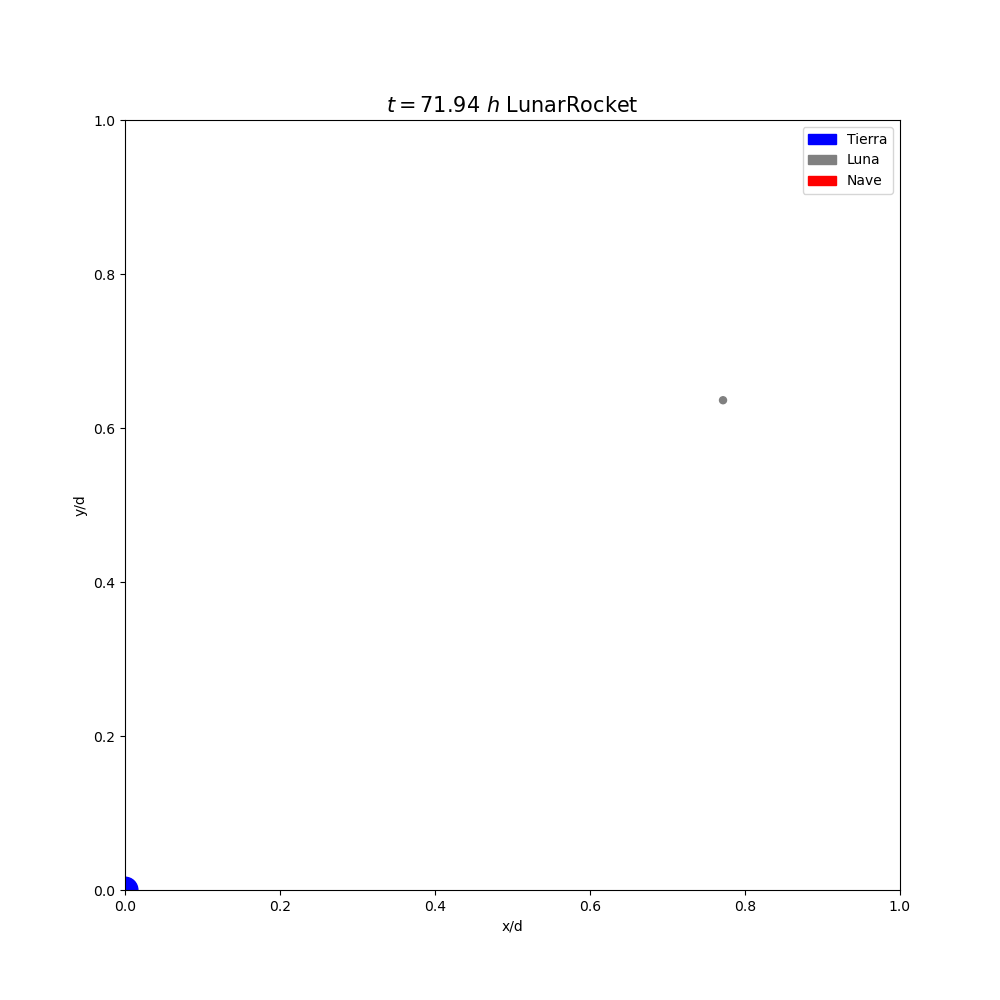

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlabel('x/d')
    ax.set_ylabel('y/d')

def Update(i):
    
    plot = ax.clear()
    init()
    ax.set_title(r'$t=%.2f \ h$ LunarRocket ' %(t[i] / 3600), fontsize=15)
    
    circleEarth = plt.Circle((0,0), rT/d, color='blue', fill=True, label = 'Tierra')
    circleMoon  = plt.Circle((xMoon[i],yMoon[i]), rL/d, color='grey', fill=True, label = 'Luna')
    circleSpacecraft = plt.Circle((x[i],y[i]), (rL/d)/10, color='red', fill=True, label = 'Nave')

    ax.add_patch(circleEarth)
    ax.add_patch(circleMoon)
    ax.add_patch(circleSpacecraft)

 

    plt.legend(loc = 'upper right')
        
    return plot

Animation = anim.FuncAnimation(fig, Update, frames=len(t), init_func=init, interval = 10, repeat = False)

plt.show()